In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os
import numpy as np

In [4]:
labels = ['baju', 'balon', 'buku', 'dasi', 'jam', 'kaca', 'kuku', 'lampu', 'meja', 'paku', 'papan', 'pohon', 'spidol', 'tali', 'tas']
classes = ['baju', 'balon', 'buku', 'dasi', 'jam', 'kaca', 'kuku', 'lampu', 'meja', 'paku', 'papan', 'pohon', 'spidol', 'tali', 'tas']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_data('/content/drive/MyDrive/Colab Notebooks/new_dataset/dataset')
# val = get_data('/content/drive/MyDrive/Colab Notebooks/new_dataset/dataset')
val = train

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


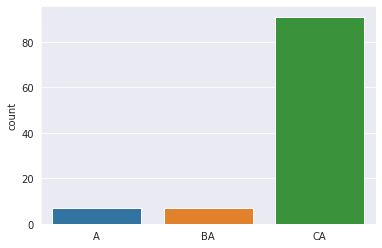

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("A")
    elif (i[1] == 1):
        l.append("BA")
    else:
        l.append("CA")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'baju')

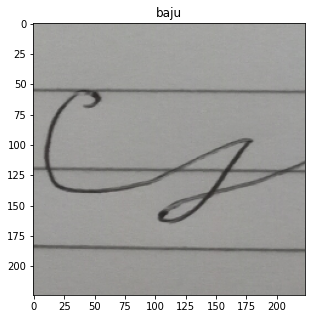

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'tas')

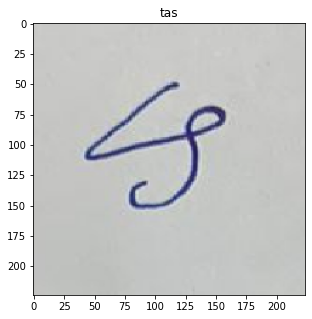

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(15, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [12]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(x_train,y_train,epochs = 1000 , validation_data = (x_val, y_val))

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


7/7 [==============================] - 18s 2s/step - loss: 2.7128 - accuracy: 0.0714 - val_loss: 2.7119 - val_accuracy: 0.0619
Epoch 2/1000
7/7 [==============================] - 16s 2s/step - loss: 2.7142 - accuracy: 0.0762 - val_loss: 2.7114 - val_accuracy: 0.0667
Epoch 3/1000
7/7 [==============================] - 16s 2s/step - loss: 2.7198 - accuracy: 0.0810 - val_loss: 2.7109 - val_accuracy: 0.0619
Epoch 4/1000
7/7 [==============================] - 16s 2s/step - loss: 2.7283 - accuracy: 0.0381 - val_loss: 2.7104 - val_accuracy: 0.0619
Epoch 5/1000
7/7 [==============================] - 16s 2s/step - loss: 2.7281 - accuracy: 0.0429 - val_loss: 2.7101 - val_accuracy: 0.0667
Epoch 6/1000
7/7 [==============================] - 16s 2s/step - loss: 2.7030 - accuracy: 0.0714 - val_loss: 2.7099 - val_accuracy: 0.0619
Epoch 7/1000
7/7 [==============================] - 16s 2s/step - loss: 2.7172 - accuracy: 0.0619 - val_loss: 2.7096 - val_accuracy: 0.0619
Epoch 8/1000
7/7 [===============

In [14]:
model.save('/content/drive/MyDrive/Colab Notebooks/dataset/model-new14.h5')

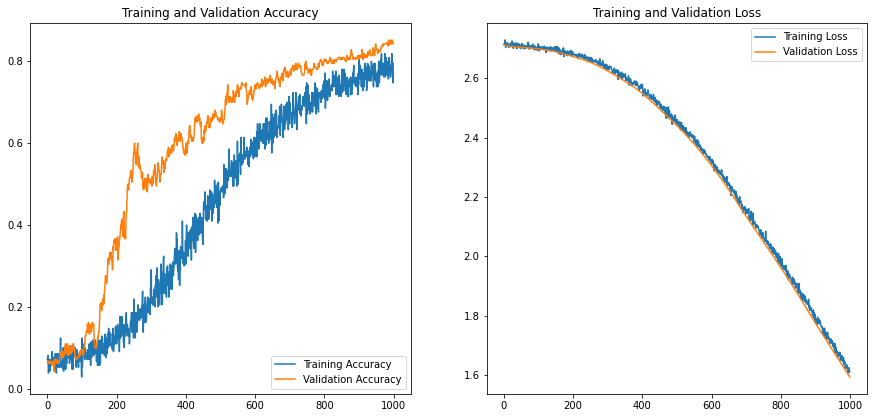

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# print(acc, val_acc, loss, val_loss)
epochs_range = range(1000)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
(loss, accuracy) = model.evaluate(x_val,y_val)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

7/7 [==============================] - 3s 489ms/step - loss: 1.5940 - accuracy: 0.8429
[INFO] loss=1.5940, accuracy: 84.2857%


In [17]:
data_test = []
img_size = 224
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/new_dataset/dataset/baju/baju.14.jpg')[...,::-1]
resized_arr = cv2.resize(image, (img_size, img_size))
# print(resized_arr)
data_test.append([resized_arr, 2])
data_test = np.array(data_test)
# print(data_test)
x_test, y_test = [], []
for feature, label in data_test:
  x_test.append(feature)
  y_test.append(label)
x_test = np.array(x_test) / 255

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
probs = model.predict([x_test])
probs.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


(1, 15)

In [18]:
prediction = probs.argmax(axis=1)
# print(probs[prediction] * 100)
print(prediction[0])
classes[prediction[0]]

0


'baju'

In [19]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['A', 'BA', 'CA']))

AttributeError: ignored